In [470]:
# !!pip install mlxtend

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [472]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

In [473]:
import pandas as pd
customers = pd.read_csv('/Users/damac44/Desktop/absa/customer.csv')
transaction = pd.read_csv('/Users/damac44/Desktop/absa/transactions.csv')
income = pd.read_csv('/Users/damac44/Desktop/absa/income_group.csv')
train = pd.read_csv('/Users/damac44/Desktop/absa/Train.csv')
emp_status = pd.read_csv('/Users/damac44/Desktop/absa/employment_status.csv')


In [474]:
customers.head()

,CUSTOMER_IDENTIFIER,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,2022-09,1,6,4,7,51
1,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,2022-09,0,7,10,3,32
2,ID_17215674e76eb33b47c4dd3ac3392e3e8f1a34b131b...,2022-09,1,7,7,1,41
3,ID_212860dd16c79ea8eae97cc1fc181e6afd4862fceaf...,2022-09,0,13,10,1,44
4,ID_24953f74da44bd0915c4cb78c1d97cbbd66e85bbd91...,2022-08,0,13,6,1,44


In [475]:
transaction.head()


,TRANSACTION_DESCRIPTION,CUSTOMER_IDENTIFIER,RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE
0,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-13 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,1857.56,1000.00,11785,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
1,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-02-26 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,8843.46,-2000.00,11348,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
2,POS PURCHASE,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,23.82,-199.98,148,CHEQ,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,04ae923a903fb07b5c846eb61eda25c4766800f02c2e09...
3,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-03-27 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,198.11,-79.39,11419,SAVE,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
4,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-05-06 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,13631.60,-200.00,11528,SAVE,atm,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN


In [476]:
income.head()


,income_group_code,income_group_desc
0,0,NOT SUPPLIED
1,1,R 0 - 499
2,2,R500 - 999
3,3,"R1,000 - 1,999"
4,4,"R2,000 - 2,999"


In [477]:
train.head()


,CUSTOMER_IDENTIFIER,RECORD_DATE,DECLARED_NET_INCOME
0,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,13500.0
1,ID_782a96eb5b14b4cedc7df05389c6e4751c087026513...,2022-04,9000.0
2,ID_fbf3035c5b8e7da652269551c78d634a48bca823076...,2022-06,8000.0
3,ID_a0081832892639d933929e24ce46203ea417e17ecbe...,2022-08,7000.0
4,ID_86ee557b2a4506ac40331d40370a40e37e0b95b9f23...,2022-07,10400.0


In [478]:
emp_status.head()

,employee_status_code,employee_status_desc
0,0,Resigned
1,3,Active
2,1,Inactive
3,2,Retiree


In [479]:
absa_df = pd.merge(transaction, customers, on='CUSTOMER_IDENTIFIER', how='inner')
absa_df = pd.merge(absa_df, train, on='CUSTOMER_IDENTIFIER', how='inner')
absa_df.head()

,TRANSACTION_DESCRIPTION,CUSTOMER_IDENTIFIER,RECORD_DATE_x,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,RECORD_DATE_y,DECLARED_NET_INCOME
0,POS PURCHASE,ID_0925f20edcf26977988f43469681d58441b449a88c7...,2022-06-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,24.59,-38.91,50,CHEQ,system,0e77f4d244bd3833b4aa54d3ed788a1d99e127b1cf63fd...,c9681cfc2cec371c82a1d38bad5fc9416868c36d17d0df...,2022-09,1,8,6,3,27,2022-06,8000.0
1,ATM WITHDRAWAL,ID_0925f20edcf26977988f43469681d58441b449a88c7...,2022-06-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,724.59,-150.00,61,CHEQ,atm,0e77f4d244bd3833b4aa54d3ed788a1d99e127b1cf63fd...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-09,1,8,6,3,27,2022-06,8000.0
2,POS PURCHASE,ID_0925f20edcf26977988f43469681d58441b449a88c7...,2022-06-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,434.59,-270.00,68,CHEQ,system,0e77f4d244bd3833b4aa54d3ed788a1d99e127b1cf63fd...,1b8ec6be2399059c5f8b41042c79766bca453a024e87d1...,2022-09,1,8,6,3,27,2022-06,8000.0
3,CASH ACCEPTOR DEP,ID_0925f20edcf26977988f43469681d58441b449a88c7...,2022-06-28 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,874.59,850.00,55,CHEQ,atm,0e77f4d244bd3833b4aa54d3ed788a1d99e127b1cf63fd...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-09,1,8,6,3,27,2022-06,8000.0
4,CASH ACCEPTOR DEP,ID_0925f20edcf26977988f43469681d58441b449a88c7...,2022-06-22 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,100.00,100.00,38,CHEQ,atm,0e77f4d244bd3833b4aa54d3ed788a1d99e127b1cf63fd...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-09,1,8,6,3,27,2022-06,8000.0


In [480]:
absa_df.dtypes

TRANSACTION_DESCRIPTION      object
CUSTOMER_IDENTIFIER          object
RECORD_DATE_x                object
ACCOUNT_TYPE_CODE            object
ACCOUNT_BALANCE             float64
AMT                         float64
EVENT_NUMBER                  int64
PRODUCT_CODE                 object
CHANNEL                      object
ACCOUNT_NUMBER               object
TRANSACTION_REFERENCE        object
DATE_LAST_UPDATED            object
SEX_CODE                      int64
INCOME_GROUP_CODE             int64
NUMBER_OF_ACCOUNTS            int64
OCCUPATIONAL_STATUS_CODE      int64
AGE                           int64
RECORD_DATE_y                object
DECLARED_NET_INCOME         float64
dtype: object

In [481]:
absa_df['TRANSACTION_DESCRIPTION'].fillna('No Description', inplace=True)

In [482]:
absa_df.duplicated().sum()

0

In [483]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
absa_df['TRANSACTION_DESCRIPTION']= label_encoder.fit_transform(absa_df['TRANSACTION_DESCRIPTION'])
absa_df['CUSTOMER_IDENTIFIER']= label_encoder.fit_transform(absa_df['CUSTOMER_IDENTIFIER'])
absa_df['RECORD_DATE_x']= label_encoder.fit_transform(absa_df['RECORD_DATE_x'])
absa_df['ACCOUNT_TYPE_CODE']= label_encoder.fit_transform(absa_df['ACCOUNT_TYPE_CODE'])
absa_df['PRODUCT_CODE']= label_encoder.fit_transform(absa_df['PRODUCT_CODE'])
absa_df['CHANNEL']= label_encoder.fit_transform(absa_df['CHANNEL'])
absa_df['ACCOUNT_NUMBER']= label_encoder.fit_transform(absa_df['ACCOUNT_NUMBER'])
absa_df['DATE_LAST_UPDATED']= label_encoder.fit_transform(absa_df['DATE_LAST_UPDATED'])
absa_df['RECORD_DATE_y']= label_encoder.fit_transform(absa_df['RECORD_DATE_y'])



In [484]:
absa_df['CHANNEL'].value_counts()

2    357802
0    138326
1     84517
3     15000
Name: CHANNEL, dtype: int64

In [485]:
absa_df['PRODUCT_CODE'].value_counts()

0    331961
1    263684
Name: PRODUCT_CODE, dtype: int64

In [486]:
absa_df = absa_df.drop('TRANSACTION_REFERENCE', axis=1)


In [487]:
absa_df.isnull().sum()

TRANSACTION_DESCRIPTION     0
CUSTOMER_IDENTIFIER         0
RECORD_DATE_x               0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
DATE_LAST_UPDATED           0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
RECORD_DATE_y               0
DECLARED_NET_INCOME         0
dtype: int64

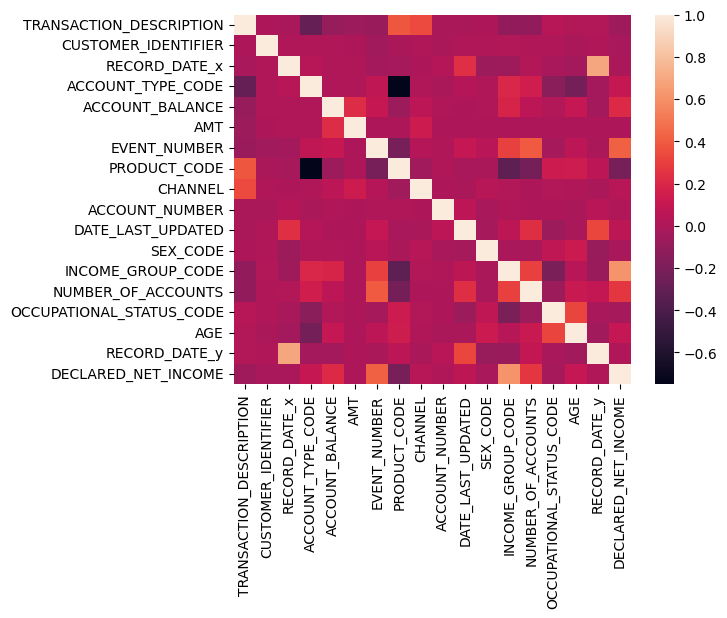

In [488]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

dataplot=sb.heatmap(absa_df.corr())
  
# displaying heatmap
mp.show()

<Axes: >

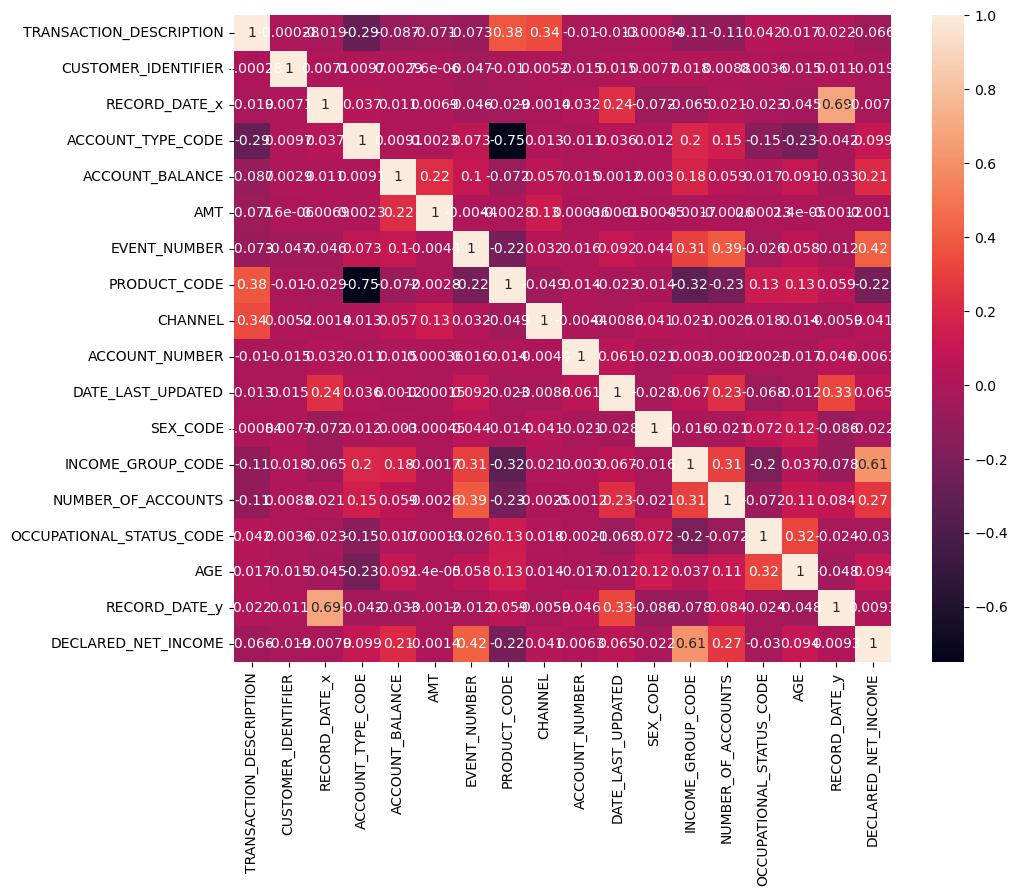

In [489]:
cor = absa_df.corr()

plt.figure(figsize=(10.6, 8.4))  # Width: 10.6 inches, Height: 8.4 inches
sns.heatmap(cor, annot = True)

In [490]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.30) #Removing both constant and quasi-constant
var_thr.fit(absa_df)

var_thr.get_support()



array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True])

In [491]:
absa_df = absa_df.drop(['SEX_CODE'], axis=1)


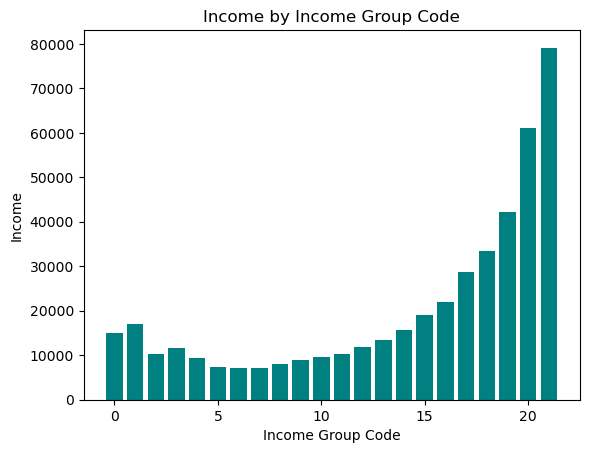

In [492]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df1 = pd.DataFrame(absa_df)

# Group the data by product code and calculate the mean income for each group
grouped_data = absa_df.groupby('INCOME_GROUP_CODE')['DECLARED_NET_INCOME'].mean().sort_values(ascending=False)
# Plot the graph
grouped_data = grouped_data.sort_values()
plt.bar(grouped_data.index, grouped_data.values, color='teal')
plt.xlabel('Income Group Code')
plt.ylabel('Income')
plt.title('Income by Income Group Code')
plt.show()


In [493]:

df1 = pd.DataFrame(absa_df)

features = ['INCOME_GROUP_CODE','OCCUPATIONAL_STATUS_CODE','ACCOUNT_TYPE_CODE','ACCOUNT_NUMBER','RECORD_DATE_y','AGE','CUSTOMER_IDENTIFIER']
target = 'DECLARED_NET_INCOME'
X = df1[features]
Y = df1[target]


In [494]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.2, random_state=42)



In [495]:
from sklearn.metrics import mean_squared_error, r2_score

#import the regressors
from sklearn.ensemble import RandomForestRegressor

#create regressor object
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
# lasso = Lasso(alpha=0.1, random_state=42)

# Model Fitting
random_forest.fit(X_train, y_train)

# Test Predictions
rf_test_y_pred = random_forest.predict(X_test)

# Test assessment
mse = mean_squared_error(y_test, rf_test_y_pred)
r2 = r2_score(y_test, rf_test_y_pred)
print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

# train Predictions
rf_train_y_pred = random_forest.predict(X_train)

# Train assessment
mse = mean_squared_error(y_train, rf_train_y_pred)
r2 = r2_score(y_train, rf_train_y_pred)
print(f"\n\nTraining Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")


Testing Mean Squared Error: 27829.26250535134
Testing R-squared: 0.9996576918477001


Training Mean Squared Error: 9672.103205348823
Training R-squared: 0.9998822236787495


In [496]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score

decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train, y_train)


dt_test_y_pred = decision_tree.predict(X_test)


mse = mean_squared_error(y_test, dt_test_y_pred)
r2 = r2_score(y_test, dt_test_y_pred)
print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

# train Predictions
dt_train_y_pred = decision_tree.predict(X_train)

# Train assessment
mse = mean_squared_error(y_train, dt_train_y_pred)
r2 = r2_score(y_train, dt_train_y_pred)
print(f"\n\nTraining Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")

Testing Mean Squared Error: 17622.157493137693
Testing R-squared: 0.9997832422555267


Training Mean Squared Error: 0.0
Training R-squared: 1.0


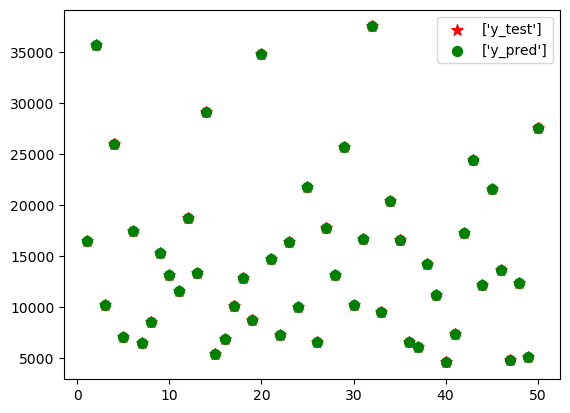

In [497]:

# plot test prediction vs actual Decision Tree
# plt.title('y_test & y_pred')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=dt_test_y_pred[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()

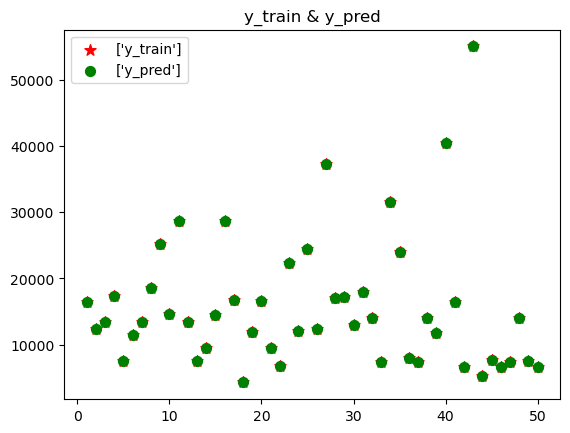

In [498]:
# plot train prediction vs actual Decision Tree
dt_train_y_pred
plt.title('y_train & y_pred')
plt.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_train'])
plt.scatter(x=range(1,51),y=dt_train_y_pred[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()

In [499]:
import pickle

model_save_path = "dt.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(decision_tree,file)
    
model_save_path = "rf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(random_forest,file)